In [1]:
import numpy as np
from data import Instance, DataSet
from miscellaneous import initialize_data, plot_graph, plot_points
from neural_network import NeuralNetwork
from activation_function import *
import matplotlib.pyplot as plt
from keras.datasets import mnist
import copy

/home/xeds/.conda/envs/atividade1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Leitura do conjunto de dados

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Descobrindo o número de instâncias e as dimensões de cada uma

In [3]:
num_instances, dim_x, dim_y = x_train.shape
num_instances += x_test.shape[0]

### Normalizando

In [4]:
#Treinamento
norm_input_train = [np.divide(i.astype(np.float32),255).flatten() for i in x_train]

output_train = []
y = 10*[0.0]

for n in y_train:
    y[n] = 1.0
    output_train.append(copy.deepcopy(y))
    y[n] = 0.0

In [5]:
#Teste
norm_input_test = [np.divide(i.astype(np.float32),255).flatten() for i in x_test]

output_test = []
y = 10*[0.0]

for n in y_test:
    y[n] = 1.0
    output_test.append(copy.deepcopy(y))
    y[n] = 0.0

### Organizando o dataset para ser passado no padrão aceito pela rede neural

In [6]:
dataset = DataSet() 

for i,j in zip(norm_input_train + norm_input_test, output_train + output_test):
    dataset.add(Instance(i,j))

### Regularização

#### 1 - Rede Neural 2

In [7]:
net_2 = NeuralNetwork(dim_x*dim_y ,[10], [tanh_func],"l2",0.01) # 84,51% - treino / 85,91% - teste
data_2 = net_2.fit(dataset, "mini-batch", 50, lr_ = 0.1, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], print_info = True)

Epoch 1/50
60000/60000 [==============================] - 18s 304us/step - loss: 0.1012 - categorical_accuracy: 0.7877
Epoch 2/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0502 - categorical_accuracy: 0.8443
Epoch 3/50
60000/60000 [==============================] - 10s 165us/step - loss: 0.0495 - categorical_accuracy: 0.8456
Epoch 4/50
60000/60000 [==============================] - 7s 124us/step - loss: 0.0495 - categorical_accuracy: 0.8449
Epoch 5/50
60000/60000 [==============================] - 8s 136us/step - loss: 0.0495 - categorical_accuracy: 0.8445
Epoch 6/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.0495 - categorical_accuracy: 0.8452
Epoch 7/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.0495 - categorical_accuracy: 0.8440
Epoch 8/50
60000/60000 [==============================] - 12s 203us/step - loss: 0.0495 - categorical_accuracy: 0.8449
Epoch 9/50
60000/60000 [=============================

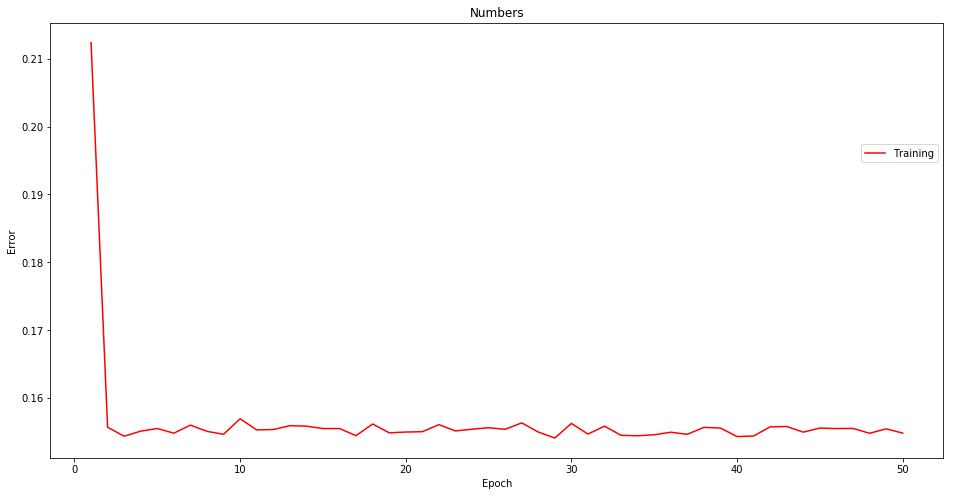

In [8]:
plot_graph(data_2, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### 2 - Rede Neural 3

In [10]:
net_3 = NeuralNetwork(dim_x*dim_y ,[10], [sig_func])# 92,85% - treino / 92,2% - teste
data_3 = net_3.fit(dataset, "mini-batch", 50, lr_ = 0.5, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.3, print_info = True, 
                   loss_ = "categorical_crossentropy")

Epoch 1/50
60000/60000 [==============================] - 7s 121us/step - loss: 0.3823 - categorical_accuracy: 0.8906
Epoch 2/50
60000/60000 [==============================] - 7s 113us/step - loss: 0.3075 - categorical_accuracy: 0.9132
Epoch 3/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.2982 - categorical_accuracy: 0.9156
Epoch 4/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.2911 - categorical_accuracy: 0.9174
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.2860 - categorical_accuracy: 0.9191
Epoch 6/50
60000/60000 [==============================] - 9s 149us/step - loss: 0.2842 - categorical_accuracy: 0.9196
Epoch 7/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.2789 - categorical_accuracy: 0.9223
Epoch 8/50
60000/60000 [==============================] - 8s 137us/step - loss: 0.2768 - categorical_accuracy: 0.9219
Epoch 9/50
60000/60000 [==============================] 

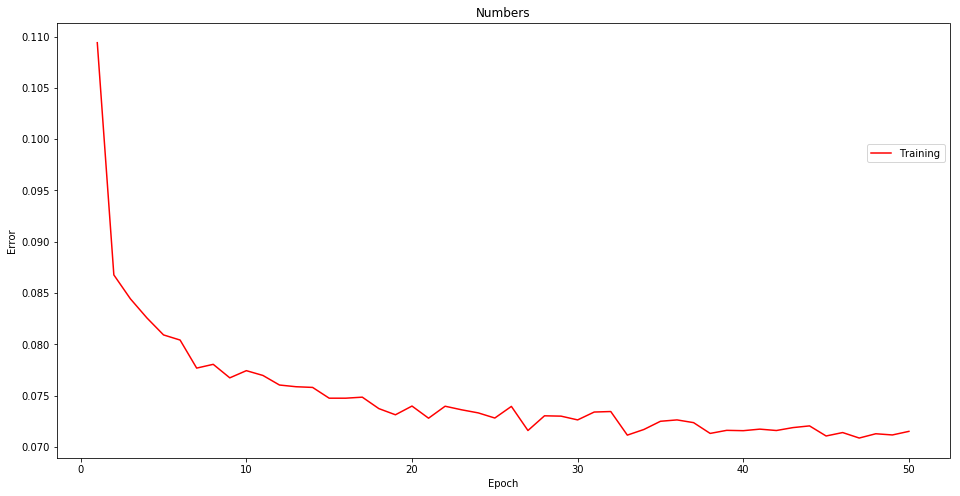

In [11]:
plot_graph(data_3, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### Apenas testes

In [21]:
net_ca = NeuralNetwork(dim_x*dim_y ,[10], [sig_func])# 92,7% - treino / 91,43% - teste
data_ca = net_ca.fit(dataset, "mini-batch", 50, lr_ = 0.01, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.0, print_info = True, 
                   loss_ = "categorical_crossentropy", opt = "adam")

Epoch 1/50
60000/60000 [==============================] - 8s 126us/step - loss: 0.3634 - categorical_accuracy: 0.8979
Epoch 2/50
60000/60000 [==============================] - 8s 127us/step - loss: 0.3106 - categorical_accuracy: 0.9149
Epoch 3/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.2976 - categorical_accuracy: 0.9185
Epoch 4/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.2950 - categorical_accuracy: 0.9202
Epoch 5/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.2916 - categorical_accuracy: 0.9214
Epoch 6/50
60000/60000 [==============================] - 8s 141us/step - loss: 0.2884 - categorical_accuracy: 0.9205
Epoch 7/50
60000/60000 [==============================] - 9s 151us/step - loss: 0.2836 - categorical_accuracy: 0.9211
Epoch 8/50
60000/60000 [==============================] - 9s 156us/step - loss: 0.2794 - categorical_accuracy: 0.9230
Epoch 9/50
60000/60000 [==============================] 

In [24]:
net_cu = NeuralNetwork(dim_x*dim_y ,[10], [sig_func], "l2", 0.1)# 92,63% - treino / 92,30% - teste
data_cu = net_cu.fit(dataset, "mini-batch", 50, lr_ = 0.01, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.0, print_info = True, 
                   loss_ = "categorical_crossentropy", opt = "adam")

Epoch 1/50
60000/60000 [==============================] - 10s 174us/step - loss: 1.6223 - categorical_accuracy: 0.7759
Epoch 2/50
60000/60000 [==============================] - 10s 164us/step - loss: 1.4822 - categorical_accuracy: 0.7873
Epoch 3/50
60000/60000 [==============================] - 11s 179us/step - loss: 1.4534 - categorical_accuracy: 0.7883
Epoch 4/50
60000/60000 [==============================] - 10s 174us/step - loss: 1.4459 - categorical_accuracy: 0.7859
Epoch 5/50
60000/60000 [==============================] - 10s 166us/step - loss: 1.4396 - categorical_accuracy: 0.7874
Epoch 6/50
60000/60000 [==============================] - 10s 169us/step - loss: 1.4372 - categorical_accuracy: 0.7869
Epoch 7/50
60000/60000 [==============================] - 11s 183us/step - loss: 1.4337 - categorical_accuracy: 0.7890
Epoch 8/50
60000/60000 [==============================] - 10s 174us/step - loss: 1.4324 - categorical_accuracy: 0.7877
Epoch 9/50
60000/60000 [========================

#### 3 - Rede Neural 7

In [26]:
net_7 = NeuralNetwork(dim_x*dim_y ,[50, 10], 2*[sig_func]) # 99.87% - treino / 97.15% - teste
data_7 = net_7.fit(dataset, "mini-batch", 35, lr_ = 0.01, type = "class", mini_batch_size = 75, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.0, print_info = True,
                   loss_ = "categorical_crossentropy", opt = "adamax")

Epoch 1/35
60000/60000 [==============================] - 8s 139us/step - loss: 0.3801 - categorical_accuracy: 0.9017
Epoch 2/35
60000/60000 [==============================] - 8s 130us/step - loss: 0.1887 - categorical_accuracy: 0.9465
Epoch 3/35
60000/60000 [==============================] - 8s 125us/step - loss: 0.1468 - categorical_accuracy: 0.9585
Epoch 4/35
60000/60000 [==============================] - 8s 134us/step - loss: 0.1216 - categorical_accuracy: 0.9647
Epoch 5/35
60000/60000 [==============================] - 8s 137us/step - loss: 0.1051 - categorical_accuracy: 0.9704
Epoch 6/35
60000/60000 [==============================] - 8s 131us/step - loss: 0.0925 - categorical_accuracy: 0.9736
Epoch 7/35
60000/60000 [==============================] - 9s 143us/step - loss: 0.0832 - categorical_accuracy: 0.9761
Epoch 8/35
60000/60000 [==============================] - 9s 148us/step - loss: 0.0753 - categorical_accuracy: 0.9787
Epoch 9/35
60000/60000 [==============================] 

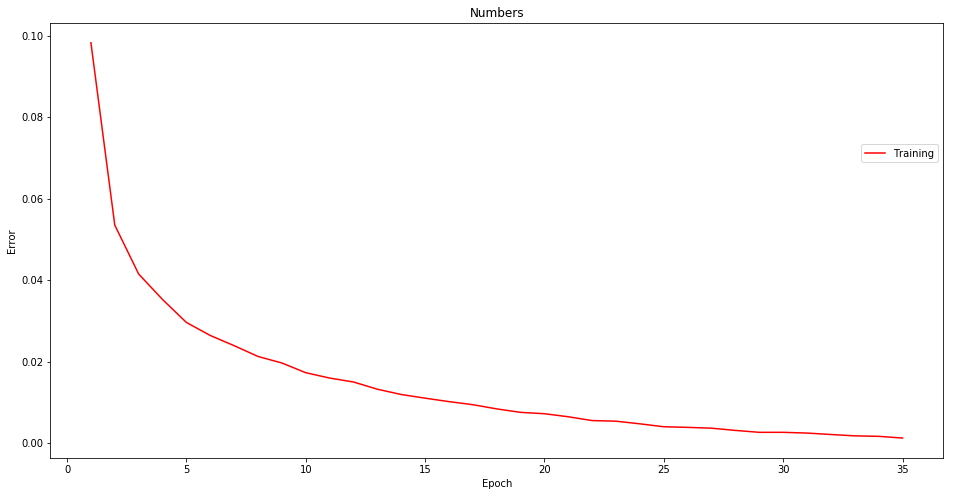

In [27]:
plot_graph(data_7, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)

#### 4 - Rede Neural 9

In [ ]:
net_9 = NeuralNetwork(dim_x*dim_y ,[30, 20, 10], 3*[relu_func]) # 99.53% - treino / 96.37% - teste
data_9 = net_9.fit(dataset, "mini-batch", 80, lr_ = 0.01, type = "class", mini_batch_size = 60, 
                   tvt_ratio = [len(norm_input_train), 0, len(norm_input_test)], momentum_ = 0.0, print_info = True,
                   loss_ = "categorical_crossentropy", opt = "adam")

In [ ]:
plot_graph(data_9, "Numbers", "Epoch", "Error", figsizex = 16, figsizey = 8)